# Using Folium to Display a Network

In [3]:
import folium
import networkx as nx
import pandas as pd

%matplotlib inline

In [4]:
# generate a network. See https://networkx.github.io/documentation/stable/reference/generators.html
G = nx.moebius_kantor_graph()

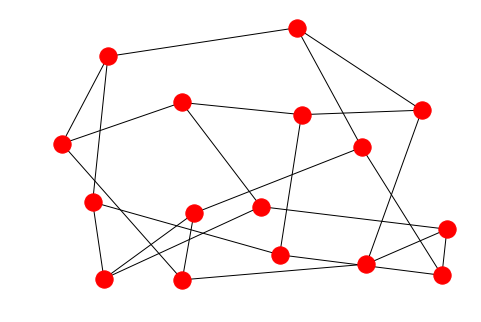

In [8]:
# Generate a layout and then draw it. But it's not interactive and folium is one common, easy to install and 
# easy to use library that can solve this problem.

pos = nx.spring_layout(G, iterations = 20)

nx.draw(G, pos)

In [41]:
# Create a new folium map. 'tiles' needs to be none to suppress instantiating a geosptial co-ordinate system.
map = folium.Map(tiles=None, crs="Simple")

In [42]:
f_scale = 100 # co-ordinate values will range from -1 to 1 and that's too small. This is a simple scaling factor.


# loop throug and add a marker. I'm keeping it simple any folium approach will work.
for i in G.nodes.keys():
    folium.Marker([pos[i][1]*f_scale,pos[i][0]*f_scale]).add_to(map)

# loop through edges and create lines between their end nodes. Note that co-ord order is reversed.
for s,t in G.edges:
    s_loc = tuple([pos[s][1]*f_scale, pos[s][0]*f_scale])
    t_loc = tuple([pos[t][1]*f_scale, pos[t][0]*f_scale])

    folium.PolyLine([s_loc,t_loc], color = 'black', weight = .2, opacity = .5).add_to(map)

In [43]:
# draw the map. Remember to set %matplotlib inline before this call. That's it!
map